# Cross Validation, Model Selection & Regularisation

In this notebook we will introduce the concepts below, and how they can be implemented in `scikit-learn`.
* Cross validation - a method for estimating the test error rate when test data is not available
* Model selection - how we use cross validation to select which model (from a selection) we should use for a particular data set
* Regularisation - an adaptation of linear regression to make it more flexible

[This video](https://www.youtube.com/watch?v=DQWI1kvmwRg) describes some of the ideas you will face in the coming notebook. The ideas we are covering here are described much more throughly in **ISLR** (see suggested sections in module overview).

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns

## Cross validation

We have already seen the notion of splitting *test* and *training sets* in order to asses model performance. Now we will introduce the idea of *validation sets*.

Once again **ISTL** (Section 5.1) provides a very clear overview of how these technqiues work:

>Resampling methods are an indispensable tool in modern statistics. They
involve repeatedly drawing samples from a training set and refitting a model
of interest on each sample in order to obtain additional information about
the fitted model. For example, in order to estimate the variability of a linear
regression fit, we can repeatedly draw different samples from the training
data, fit a linear regression to each new sample, and then examine the
extent to which the resulting fits differ. Such an approach may allow us to
obtain information that would not be available from fitting the model only
once using the original training sample.

>Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using different
subsets of the training data. However, due to recent advances in computing
power, the computational requirements of resampling methods generally
are not prohibitive. [...] cross-validation can be used to estimate the test
error associated with a given statistical learning method in order to evaluate
its performance, or to select the appropriate level of flexibility. The process
of evaluating a model’s performance is known as model assessment, whereas model
the process of selecting the proper level of flexibility for a model is known as assessment
model selection.

The [diagram](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7) below illustrates this process. Here the train and validation sets are used to do model assesment and model selection (NOTE: the test set is strictly forbidden from being used in any way during this process!). Once a model is selected the test set is used to do a final assesment of performance to see if the model selected will generalise as well as predicted.

<img src="././images/testtrainvalid.png" width="450px">

There is a simple overview these ideas [here](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7), and a more thorough overview [here](https://machinelearningmastery.com/difference-test-validation-datasets/).

### K-fold cross validation

A very common method called *k-fold* is often used, which actually splits the training set multiple times. This allows us to assess the accuracy of the model over $k$ validation splits of data. The [image below](http://ethen8181.github.io/machine-learning/model_selection/model_selection.html) illustrates how this works for $k = 5$ splits.

<img src="././images/kfold.png" width="450px">

The `scikit-learn` documentation offers a simple [example](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) of implementing k-fold on some dummy data. We will examine this below. NOTE: The `scikit-learn` documentation is **FANSTASTIC(!)** and contains working examples of every function, it should always be the first place you look when you wish to implement a new function.

**Task 1:** 

* Have a look at the code below and check you understand what is going on. (Add some print statements in various places to help.)

In [2]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([['A', 'B'], ['C', 'D'], ['E', 'F'], ['G', 'H']])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(X)

print(kf)

for train_index, valid_index in kf.split(X): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print("TRAIN:", train_index, "VALID:", valid_index)
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] VALID: [0 1]
TRAIN: [0 1] VALID: [2 3]


We can apply this to any data set to perform operations as it gives us the dataframe/numpy array indicies in each loop to select the appropriate data for each fold. For example we can apply this to the auto data set. This contains rows which correspond to individual cars and their attributes.

In [3]:
auto = pd.read_csv('./data/Auto.csv')
auto = auto[auto.horsepower != '?']
auto['horsepower'] = auto.horsepower.astype(int)
auto.reset_index(inplace=True, drop=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpg = auto.pop('mpg') # mpg will be our target and so we remove this into a seperate array

In [5]:
len(mpg)

392

Say we are trying to predict 'mpg' from our other automobile data features. We can use KFold to iterate over the number of splits we choose.

**Task 2:**
* try adding print statements for the size of the dataframes in each split
* try increasing the number of splits and re-run your code
* use the code below to print a car name contained in the train and validation data set, for each split



In [6]:
kf = KFold(n_splits=8) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(auto)

print(kf)


split_counter = 1
for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print('-'*30)
    print('This is split no: {}'.format(split_counter))
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    # your code here
    print(X_train.name.unique()[1])
    print(X_valid.name.unique()[1])    

KFold(n_splits=8, random_state=None, shuffle=False)
------------------------------
This is split no: 1
peugeot 304
buick skylark 320
------------------------------
This is split no: 2
buick skylark 320
peugeot 304
------------------------------
This is split no: 3
buick skylark 320
ford maverick
------------------------------
This is split no: 4
buick skylark 320
subaru
------------------------------
This is split no: 5
buick skylark 320
dodge aspen se
------------------------------
This is split no: 6
buick skylark 320
honda civic cvcc
------------------------------
This is split no: 7
buick skylark 320
mercedes benz 300d
------------------------------
This is split no: 8
buick skylark 320
toyota tercel


In [7]:
auto = auto.drop('name', axis=1, errors='ignore') # we do not need the car names so remove for now.

We can use the same loop to fit and evaluate our linear regression model on each train/validation split:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


split_counter = 1
mse_scores = [] # create empty list of scores for each split
kf = KFold(n_splits=5)
kf.get_n_splits(auto)

for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print('-'*30)
    print('This is split no: {}'.format(split_counter))
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    
    #### fit polynomial to train data in this split
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    #### eval & print MSE training results in this split
    mpg_train_pred = lin_reg.predict(X_train)
    mse_train = mean_squared_error(y_train, mpg_train_pred)
    print('training MSE: {0}'.format(mse_train))
    
    #### do the same for validation split
    mpg_valid_pred = lin_reg.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, mpg_valid_pred)
    print('validation MSE: {0}'.format(mse_valid))
    
    mse_scores.append(mse_valid) # assign validation MSE score to list
    

------------------------------
This is split no: 1
training MSE: 11.284070590566001
validation MSE: 14.974307651304168
------------------------------
This is split no: 2
training MSE: 11.155158050598772
validation MSE: 10.905952427081171
------------------------------
This is split no: 3
training MSE: 12.16010513687152
validation MSE: 5.991708610108162
------------------------------
This is split no: 4
training MSE: 9.921674145405685
validation MSE: 15.587544657621601
------------------------------
This is split no: 5
training MSE: 7.977511689294959
validation MSE: 27.844743081984223


When using k-fold cross validation we can analyse the validation MSE result for each split to assess the overall performance.

In [9]:
mse_scores  = np.array(mse_scores)
print('VALIDATION SET MSE SCORES')
print('mean MSE:', mse_scores.mean())
print('std MSE:', mse_scores.std())

VALIDATION SET MSE SCORES
mean MSE: 15.060851285619865
std MSE: 7.255691814890938


#### Cross validation in practice in sklearn
Most of the time we do not care about having access to each split. `Scikit-Learn` provide a much easier way to do all of this with the function `cross_val_score`. This allows us to do the same as above but in much less code.

In [10]:
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

cv_scores = cross_val_score(lin_reg, auto, mpg, cv = 5, scoring='neg_mean_squared_error') # utilisation de neg car convention dans sklearn que higher scoring val is better

print('mean MSE:',np.mean(-cv_scores))
print('std MSE:',np.std(-cv_scores))
print(cv_scores)

mean MSE: 15.060851285619865
std MSE: 7.255691814890938
[-14.97430765 -10.90595243  -5.99170861 -15.58754466 -27.84474308]


**Task 3:**

* Make sure you understand the output of the cross_val_score above (i.e. What is cv_scores?)
* Investigate what the `cross_val_predict` function does.
* Import and implement this on the same data as above.
* What are the outputs of this function?
* Can you use these to evaluate the results of your cross validation?
* Do the cross-validation scores give you confidence this model is providing a useful prediction?

In [11]:
# Cross_val_predict
from sklearn.model_selection import cross_val_predict


cv_predict = cross_val_predict(lin_reg, auto, mpg, cv = 5)

Cross_val_predict returns the predicted value when the element was in the validation set.  
It is not suitable for evaluation because it blends the 5 models together...  
It is best used for data viz (or Model blending ?)

In [12]:
print(np.mean(np.sqrt(-cv_scores)))
print(np.std(np.sqrt(-cv_scores)))

3.7689592371135645
0.9250932680525775


In [13]:
mpg.std()

7.805007486571799

## Exercise 1: wine cross-validation

You must predict the alcohol content of various wines based on their other attributes.

* Split the data into train and test data sets (Ensure you use the option: `random_state = 28`).
* Perform linear regression using k-fold cross validation(ensure you use 5 folds). Return the cross validation MSE errors. Return the mean and standard deviations of these.
* Evaluate the performance of the model on the test set.
* Compare the cross-validation error and the test error (MSE). What do you find? 
* Try removing the random_state option. What happens to your results? Explain why.

In [39]:
#### your solution here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


wine = pd.read_csv('./data/wine.csv')

In [40]:
alcohol = wine.pop('Alcohol')

In [41]:
wine

,Grape,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.84,1.01
1,1,-0.50,-0.83,-2.48,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.40,1.11,0.96
2,1,0.02,1.11,-0.27,0.09,0.81,1.21,-0.50,2.13,0.27,0.32,0.79,1.39
3,1,-0.35,0.49,-0.81,0.93,2.48,1.46,-0.98,1.03,1.18,-0.43,1.18,2.33
4,1,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,2.97,0.30,0.30,-0.33,-0.98,-1.42,1.27,-0.93,1.14,-1.39,-1.23,-0.02
174,3,1.41,0.41,1.05,0.16,-0.79,-1.28,0.55,-0.32,0.97,-1.13,-1.48,0.01
175,3,1.74,-0.39,0.15,1.42,-1.13,-1.34,0.55,-0.42,2.22,-1.61,-1.48,0.28
176,3,0.23,0.01,0.15,1.42,-1.03,-1.35,1.35,-0.23,1.83,-1.56,-1.40,0.30


In [42]:
X_train, X_test, y_train, y_test = train_test_split(wine, alcohol,random_state=28)

In [43]:
lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('mean MSE:',np.mean(-cv_scores))
print(f'mean RMSE : {np.mean(np.sqrt(-cv_scores))}')
print('std MSE:',np.std(-cv_scores))

mean MSE: 0.4771472419568701
mean RMSE : 0.6828399536518984
std MSE: 0.13726764524713442


In [44]:
lin_reg.fit(X_train,y_train)
y_test_predict = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test,y_test_predict)
rmse_test = np.sqrt(mse_test)
print(f'MSE {mse_test:.5f} | RMSE {rmse_test:.5f}')

MSE 0.47723 | RMSE 0.69082


In [45]:
alcohol.agg(['mean','std'])

mean   -0.000112
std     0.999626
Name: Alcohol, dtype: float64

## Regularisation

An alternative to choosing models which contains smaller numbers of features is to use a method that *constrains* or *regularises* the coefficent estimates assigned to each feature, or that shrinks the coefficient towards zero. This technique is very similar to *least squares* which we have been using until now. Please refer to Section in 6.2 **ISTL** for a fuller explanation of this.

When we move to use a regularised linear regression for prediction the additional term means that we now have a model parameter that requires setting. These terms are referred to as *hyperparameters* in machine learning. In practice this introduces another additional unknown parameter which we must choose somewhere in our modelling. It is common practice to run several models, each with different values of this hyperparameter, and then assess the error of each using cross validation for comparison.

For now we will focus on how to implement Lasso and Ridge regression in sklearn. These are both types of regularised linear regression.

#### Lasso regression in sklearn

In this example we aim to predict credit rating of individual customers. To train and predict using a Lasso regression we follow much the same procedure as we have seen before in `scikit-learn`.

Ressources supplémentaires si vous souhaitez creuser :

https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

http://eric.univ-lyon2.fr/~ricco/cours/slides/regularized_regression.pdf

In [47]:
credit = pd.read_csv('./data/credit_modified.csv')
rating = credit.pop('Rating')
credit.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance,African American,Asian,Caucasian
0,14.891,3606,2,34,11,0,0,1,333,0,0,1
1,106.025,6645,3,82,15,1,1,1,903,0,1,0
2,104.593,7075,4,71,11,0,0,0,580,0,1,0
3,148.924,9504,3,36,11,1,0,0,964,0,1,0
4,55.882,4897,2,68,16,0,0,1,331,0,0,1


In [48]:
#### splitting train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit, rating, random_state = 91)

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 10)
cv_scores = cross_val_score(lasso, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print('mean MSE:',np.mean(-cv_scores))
print('std MSE:',np.std(-cv_scores))



mean MSE: 148.3658024815139
std MSE: 22.577610846122578


Here we can alter the alpha parameter to change the amount of regularisation the model uses (try this yourself! - vary the value by at least factors of 10). With increases in regularisation we expect a reduction in the *variance* of the model.

#### Using Lasso with grid search

In practice we do not want to vary hyperparameters by hand to find which value is best (the model with minimum cross validation error). Of course `scikit-learn` has a function that automates this for you. Using `GridSearchCV` we pass a dictionary of parameter values we wish to investigate. The function will fit each model we have listed and calculate the cross validation error of each. It provides all the results through the object it returns.

In [61]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter=10000)

param_grid = [
 {'alpha': [0.001, 0.01, 0.1, 1, 3, 10, 100, 1000]},
 ]

grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

grid_results = pd.DataFrame(grid_search.cv_results_)

grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003313,0.000420,0.001259,0.000101,0.001,{'alpha': 0.001},-134.693531,-105.857049,-101.376944,-87.569097,-78.913304,-76.137420,-109.786540,-103.885686,-106.104721,-113.455931,-101.778022,16.450021,3
1,0.002407,0.000285,0.001003,0.000078,0.01,{'alpha': 0.01},-134.553201,-105.948212,-101.096381,-87.881139,-78.937345,-76.585584,-109.682491,-103.106018,-106.112572,-113.688788,-101.759173,16.329243,2
2,0.001800,0.000137,0.000935,0.000083,0.1,{'alpha': 0.1},-133.132694,-106.809300,-98.722275,-91.394863,-79.351692,-78.012317,-108.680986,-96.604537,-106.093953,-115.062267,-101.386489,15.688554,1
3,0.001513,0.000019,0.000883,0.000007,1,{'alpha': 1},-127.851853,-111.017555,-92.827631,-106.006184,-89.048154,-82.339570,-105.158164,-94.934777,-102.310102,-122.139519,-103.363351,13.605513,4
4,0.001557,0.000121,0.001003,0.000195,3,{'alpha': 3},-132.499698,-117.173048,-106.238114,-112.301661,-94.847286,-76.537019,-102.509314,-98.851062,-105.902336,-131.338637,-107.819817,15.910751,5


`GridSearchCV` also returns a model (with the best hyperparmeter combination it found) which has been fitted one final time to all of the training data. Therefore it is ready to make predictions on the testing set. The model can be accessed like this:

In [62]:
grid_search.best_estimator_

Lasso(alpha=0.1, max_iter=10000)

In [63]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003313,0.000420,0.001259,0.000101,0.001,{'alpha': 0.001},-134.693531,-105.857049,-101.376944,-87.569097,-78.913304,-76.137420,-109.786540,-103.885686,-106.104721,-113.455931,-101.778022,16.450021,3
1,0.002407,0.000285,0.001003,0.000078,0.01,{'alpha': 0.01},-134.553201,-105.948212,-101.096381,-87.881139,-78.937345,-76.585584,-109.682491,-103.106018,-106.112572,-113.688788,-101.759173,16.329243,2
2,0.001800,0.000137,0.000935,0.000083,0.1,{'alpha': 0.1},-133.132694,-106.809300,-98.722275,-91.394863,-79.351692,-78.012317,-108.680986,-96.604537,-106.093953,-115.062267,-101.386489,15.688554,1
3,0.001513,0.000019,0.000883,0.000007,1,{'alpha': 1},-127.851853,-111.017555,-92.827631,-106.006184,-89.048154,-82.339570,-105.158164,-94.934777,-102.310102,-122.139519,-103.363351,13.605513,4
4,0.001557,0.000121,0.001003,0.000195,3,{'alpha': 3},-132.499698,-117.173048,-106.238114,-112.301661,-94.847286,-76.537019,-102.509314,-98.851062,-105.902336,-131.338637,-107.819817,15.910751,5
5,0.001675,0.000654,0.001006,0.000267,10,{'alpha': 10},-182.681016,-155.361568,-179.884644,-148.842090,-141.841896,-86.351859,-129.718484,-131.176340,-143.631521,-181.271903,-148.076132,28.028584,6
6,0.001357,0.000019,0.000879,0.000012,100,{'alpha': 100},-188.380866,-143.744333,-184.078341,-145.491583,-157.301014,-103.112064,-146.957766,-126.231725,-143.006029,-181.543599,-151.984732,25.542857,7
7,0.001328,0.000028,0.000887,0.000019,1000,{'alpha': 1000},-188.587767,-146.517162,-180.483375,-143.257202,-158.504388,-103.017203,-150.127246,-121.916885,-144.912869,-185.805136,-152.312923,26.074170,8


**Task 4:**
* How many times will the lasso model be fitted when the GridSearchCV function is called above?

<details><summary>Hint</summary><br>
Check what the `refit=True` parameter does in GridSearchCV
</details>

* Look through the columns of the `grid_results` dataframe. Try and understand what the table contains.

nb of fitted with GridSearchCV = 80 (8*alpha *10fold)
in grid resuls =>
 - Fit times mean/std
 - mean score time (validations)
 - Test score for each fold (values, mean,sd and rank)

## Model selection

Congratulations! You have just done your first model hyperparameter tuning in `scikit-learn`! 

If we have a dataset for which we are interested in developing a predictive model. We do not know beforehand which model will perform best for this particular data or problem. Therefore, we fit and evaluate a number of different models to our data. The models could also be of varying type as well as flexibility (e.g. random forests, support vector machines, linear regression). We then need to decide which of our models we will choose to use in our final product.

As **ISLR** states:
> "we can directly estimate the test error using the validation set and cross-validation methods
discussed in Chapter 5. We can compute the validation set error or the
cross-validation error for each model under consideration, and then select
the model for which the resulting estimated test error is smallest."

This works as a simple rule, which we will follow for the remainder of this notebook. However in practice the selection can sometimes be a bit more nuanced. Read more detail [here](https://machinelearningmastery.com/a-gentle-introduction-to-model-selection-for-machine-learning/).

#### Task 5: Ridge regression in sklearn

Another type of regularised linear model is know as *Ridge regression*.

* Repeat the model prediction process above on the credit data but use a ridge regression model.
* Try replacing `GridSearchCV` with `RandomizedSearchCV`
* How do these functions differ?

In [68]:
#### your solution here
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


ridge = Ridge(max_iter=10000)

param_grid = [
 {'alpha': [0.001, 0.01, 0.1, 1, 3, 10, 100, 1000]},
 ]
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

grid_results = pd.DataFrame(grid_search_ridge.cv_results_)

grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002194,0.000290,0.001376,0.000102,0.001,{'alpha': 0.001},-134.709207,-105.847146,-101.408319,-87.535423,-78.910802,-76.088537,-109.798419,-103.970825,-106.104415,-113.431271,-101.780436,16.463655,6
1,0.001663,0.000118,0.001141,0.000063,0.01,{'alpha': 0.01},-134.708083,-105.847646,-101.405663,-87.537922,-78.910278,-76.089237,-109.797587,-103.951593,-106.104574,-113.432645,-101.778523,16.463002,5
2,0.001553,0.000019,0.001107,0.000025,0.1,{'alpha': 0.1},-134.696920,-105.852592,-101.379213,-87.562901,-78.905195,-76.096104,-109.789211,-103.762049,-106.106093,-113.446278,-101.759656,16.456623,4
3,0.001373,0.000094,0.000995,0.000099,1,{'alpha': 1},-134.591854,-105.896229,-101.125522,-87.810393,-78.868133,-76.152928,-109.700721,-102.109819,-106.115508,-113.572360,-101.594347,16.404872,3
4,0.001424,0.000146,0.000959,0.000083,3,{'alpha': 3},-134.391253,-105.965205,-100.621625,-88.340987,-78.849639,-76.222951,-109.483397,-99.544295,-106.108819,-113.805661,-101.333383,16.332863,2
5,0.001303,0.000015,0.000908,0.000016,10,{'alpha': 10},-133.890522,-106.090432,-99.320843,-89.982387,-79.071589,-76.191060,-108.669389,-95.536294,-105.969953,-114.432072,-100.915454,16.192486,1
6,0.001295,0.000013,0.000924,0.000039,100,{'alpha': 100},-134.083288,-108.689604,-99.945650,-100.567871,-82.857511,-72.598275,-102.841444,-94.279222,-106.194183,-121.853714,-102.391076,16.678747,7
7,0.001298,0.000018,0.000906,0.000006,1000,{'alpha': 1000},-159.394337,-130.276230,-139.267945,-127.599179,-104.683784,-68.050042,-105.482490,-112.287832,-123.522302,-154.546831,-122.511097,25.363301,8


In [77]:
from sklearn.utils.fixes import loguniform
ridge = Ridge(max_iter=10000)

param_grid = [
 {'alpha': loguniform(0.1,1000)},
 ]
grid_search_ridge = RandomizedSearchCV(ridge,param_grid,cv=10,n_iter=100, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

grid_results = pd.DataFrame(grid_search_ridge.cv_results_)

grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001868,0.000181,0.001267,0.000124,124.18432,{'alpha': 124.18431978438628},-134.812626,-109.527649,-101.402646,-102.271025,-83.678092,-71.742080,-102.097047,-95.010700,-106.684787,-123.655286,-103.088194,17.067264,80
1,0.001695,0.000074,0.001158,0.000044,0.286565,{'alpha': 0.2865647929318674},-134.674187,-105.862481,-101.325039,-87.614565,-78.895529,-76.109595,-109.771547,-103.384611,-106.108881,-113.473889,-101.722032,16.444214,64
2,0.001617,0.000084,0.001114,0.000019,126.591398,{'alpha': 126.59139752316108},-134.891113,-109.611208,-101.553724,-102.429497,-83.758335,-71.662533,-102.033560,-95.084569,-106.737521,-123.828959,-103.159102,17.107298,81
3,0.001493,0.000136,0.001110,0.000298,0.950154,{'alpha': 0.9501538387890021},-134.597389,-105.894062,-101.139088,-87.796811,-78.869603,-76.150286,-109.705820,-102.191139,-106.115234,-113.565809,-101.602524,16.407278,50
4,0.001459,0.000258,0.000955,0.000075,5.392922,{'alpha': 5.392921558298756},-134.192204,-106.018812,-100.106150,-88.937687,-78.894243,-76.244853,-109.206323,-97.616017,-106.072223,-114.038304,-101.132682,16.275856,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001362,0.000133,0.000958,0.000140,967.343154,{'alpha': 967.343154172192},-158.855727,-129.806139,-138.485948,-127.124476,-104.174823,-67.945014,-105.229858,-111.919074,-123.137012,-153.983205,-122.066128,25.227055,100
96,0.001293,0.000019,0.000895,0.000005,31.244166,{'alpha': 31.244166260525304},-133.225657,-106.499925,-97.765382,-93.663974,-80.134448,-75.460024,-106.584964,-93.123647,-105.614023,-116.196291,-100.826833,16.018206,9
97,0.001282,0.000006,0.000902,0.000017,114.014462,{'alpha': 114.01446224209333},-134.491718,-109.174694,-100.774634,-101.580904,-83.336560,-72.089500,-102.385419,-94.700071,-106.469054,-122.910403,-102.791296,16.900357,79
98,0.001282,0.000010,0.000903,0.000015,0.52776,{'alpha': 0.5277595174724746},-134.645571,-105.874581,-101.256268,-87.681097,-78.884660,-76.125636,-109.748149,-102.925449,-106.111805,-113.508374,-101.676159,16.429615,56


In [83]:
grid_results.loc[grid_results.rank_test_score.idxmin()]

mean_fit_time                            0.001296
std_fit_time                             0.000022
mean_score_time                          0.000912
std_score_time                           0.000021
param_alpha                             20.125308
params               {'alpha': 20.12530845519356}
split0_test_score                     -133.461995
split1_test_score                     -106.253666
split2_test_score                      -98.262553
split3_test_score                      -91.920546
split4_test_score                      -79.577756
split5_test_score                      -75.892632
split6_test_score                     -107.588994
split7_test_score                      -93.721042
split8_test_score                     -105.755754
split9_test_score                     -115.261122
mean_test_score                       -100.769606
std_test_score                          16.070061
rank_test_score                                 1
Name: 8, dtype: object

## Exercise 2: Moneyball

Moneyball, as well as being a fantastic story, is also a true story of statistical methods being applied in a real world context to make predictions for decision making. [The film Moneyball](https://www.youtube.com/watch?v=-4QPVo0UIzc) is well worth a watch if you have time. As well as in baseball most major competitive sports teams are now using data science to improve their performance, e.g. [football](http://outsideoftheboot.com/2013/06/26/rise-of-data-analysis-in-football/),...

In this exercise you have been hired by Oakland Athletics general manager Billy Beane. Your first mission is to predict the salary each player will make based on other information that is available. This will allow Billy to understand what price he should pay for players in the next transfer season.

You must:
* Import and prepare the data
* Create a train and test set
* Implement a regularised model of your choice
* Choose optimal parameters for your regularised model
* Estimate test-error using k-fold cross validation
* Calculate the true test-error

<details><summary>HINT 1</summary><br>
Some values are missing. You can drop these rows.
</details>

<details><summary>HINT 2</summary><br>
Some columns do not contain numerical values. You can drop these columns.
</details>

#### clean data

In [145]:
#### note data is in the Hitters.csv file
baseball = pd.read_csv('data/Hitters.csv')
#### your solution here



In [146]:
baseball.isna().value_counts()

Unnamed: 0  AtBat  Hits   HmRun  Runs   RBI    Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI   CWalks  League  Division  PutOuts  Assists  Errors  Salary  NewLeague
False       False  False  False  False  False  False  False  False   False  False   False  False  False   False   False     False    False    False   False   False        263
                                                                                                                                                      True    False         59
dtype: int64

In [147]:
baseball

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [148]:
baseball.Salary.isna().value_counts()

False    263
True      59
Name: Salary, dtype: int64

In [149]:
baseball = baseball.dropna(how='any')

In [150]:
baseball[['League','Division','NewLeague']].value_counts()

League  Division  NewLeague
A       W         A            67
        E         A            64
N       W         N            58
        E         N            56
                  A             5
        W         A             5
A       E         N             4
        W         N             4
dtype: int64

=>https://en.wikipedia.org/wiki/Major_League_Baseball  
League :  - A = American League
          - N = National League  
Divition = East, Central, West  
Je vais drop ces variables pour l'instantces

In [151]:
baseball_dp = baseball.drop(['Unnamed: 0','League','Division','NewLeague'],axis=1)

#### Observation des données

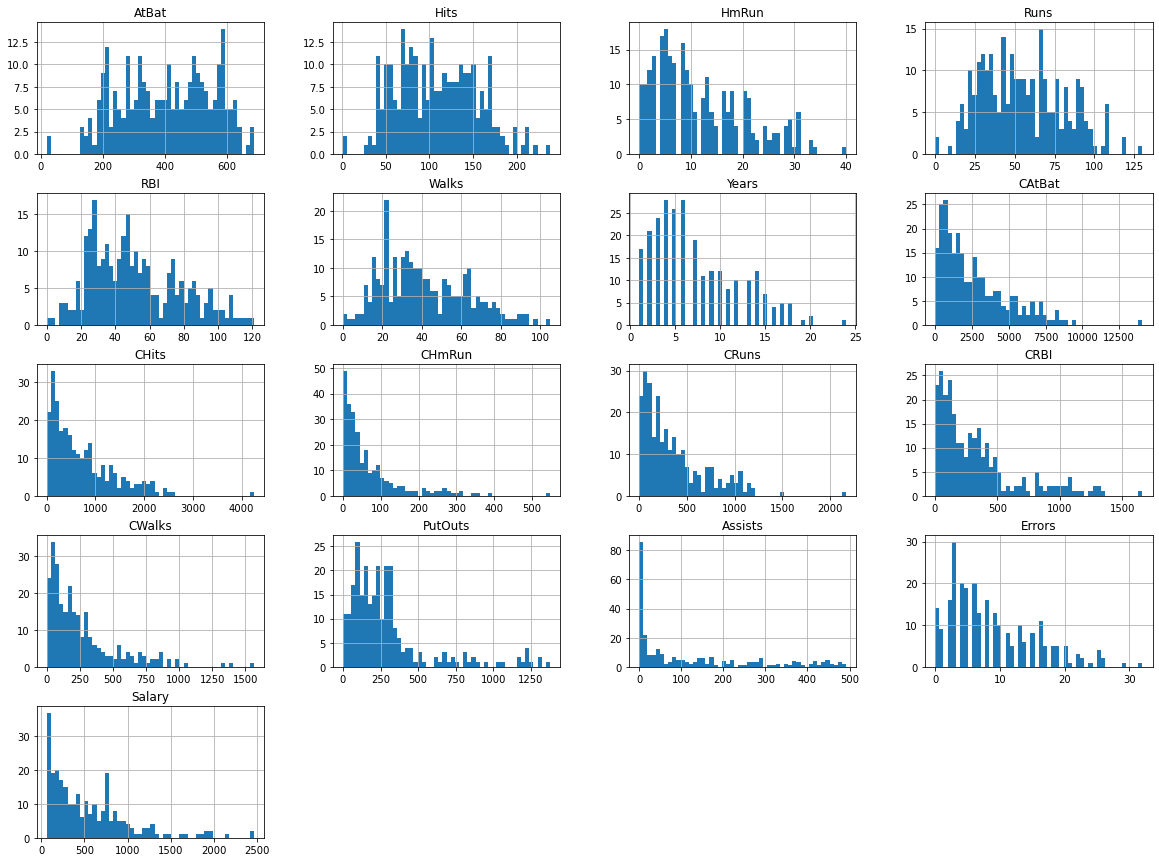

In [161]:
baseball_dp.hist(bins=50, figsize=(20,15));

# Generation train/test df

In [ ]:
salary = baseball.pop('Salary')

In [136]:
X_train, X_test, y_train, y_test = train_test_split(credit, rating, random_state = 91)

In [137]:
baseball_train,baseball_test,salary_train,salary_test = train_test_split(baseball_dp,salary,random_state=2708)

In [138]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=1000)
param_grid = [
 {'alpha': loguniform(0.1,1000)},
 ]
grid_search_rdm_lasso = RandomizedSearchCV(lasso,param_grid,cv=10,n_iter=100, scoring='neg_mean_squared_error')
grid_search_rdm_lasso.fit(baseball_train, salary_train)

grid_results = pd.DataFrame(grid_search_rdm_lasso.cv_results_)

grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001937,0.000357,0.001279,0.000249,278.72267,{'alpha': 278.7226699100683},-0.611816,-0.600478,-0.343642,-0.269018,-0.260673,-0.175962,-0.981985,-0.946016,-0.259924,-0.158769,-0.460828,0.292001,88
1,0.001648,0.000377,0.001030,0.000089,913.970982,{'alpha': 913.9709816255289},-6.594152,-6.530344,-3.711744,-2.897304,-2.801031,-1.926930,-10.574655,-10.244809,-2.856778,-1.696553,-4.983430,3.151692,100
2,0.001444,0.000024,0.000937,0.000020,138.525242,{'alpha': 138.52524178782093},-0.149957,-0.147173,-0.083994,-0.066345,-0.064501,-0.043351,-0.240747,-0.229163,-0.061577,-0.039332,-0.112614,0.071160,61
3,0.001785,0.000276,0.001006,0.000192,1.302837,{'alpha': 1.3028365938302051},-0.508508,-0.414056,-0.130259,-0.143250,-0.395510,-0.001823,-0.290299,-0.002897,-0.206475,-0.498139,-0.259122,0.180986,82
4,0.001475,0.000079,0.000966,0.000039,739.378264,{'alpha': 739.3782644289752},-4.316469,-4.260335,-2.425979,-1.895002,-1.833046,-1.261688,-6.921751,-6.677506,-1.869584,-1.110431,-3.257179,2.057830,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001529,0.000088,0.000942,0.000078,40.176247,{'alpha': 40.17624747006059},-0.012257,-0.010321,-0.006772,-0.005527,-0.005498,-0.003269,-0.019512,-0.015741,-0.003815,-0.003492,-0.008620,0.005350,9
96,0.001626,0.000072,0.000903,0.000004,1.204378,{'alpha': 1.2043782746996272},-0.491036,-0.391836,-0.123313,-0.134641,-0.369283,-0.001712,-0.274861,-0.003105,-0.197776,-0.486850,-0.247442,0.174294,80
97,0.001453,0.000023,0.000912,0.000018,34.431714,{'alpha': 34.431714007291156},-0.009043,-0.008250,-0.004753,-0.004039,-0.004504,-0.002412,-0.014331,-0.011561,-0.003133,-0.002674,-0.006470,0.003902,2
98,0.001597,0.000063,0.000912,0.000026,1.524882,{'alpha': 1.5248817034446422},-0.318864,-0.444644,-0.140824,-0.149975,-0.344818,-0.002416,-0.323994,-0.002882,-0.222162,-0.571053,-0.252163,0.174696,81


In [143]:
grid_results.loc[grid_results.rank_test_score.idxmin()]

mean_fit_time                            0.001494
std_fit_time                              0.00005
mean_score_time                          0.000914
std_score_time                           0.000022
param_alpha                             25.842186
params               {'alpha': 25.84218558980374}
split0_test_score                       -0.017232
split1_test_score                       -0.003916
split2_test_score                       -0.004427
split3_test_score                       -0.004372
split4_test_score                       -0.003629
split5_test_score                       -0.002361
split6_test_score                       -0.007787
split7_test_score                       -0.007607
split8_test_score                       -0.002853
split9_test_score                       -0.004741
mean_test_score                         -0.005892
std_test_score                           0.004143
rank_test_score                                 1
Name: 47, dtype: object

In [142]:
best_alpha = grid_results.loc[grid_results.rank_test_score.idxmin()]['param_alpha']

**Task 6:**
* Ridge regression works best when the input variables are standardised. (See section 6.2 **ISLR** for more details.). Try standardising your data before running your model. Do you find different results?
* does this model outperform a simple linear regression model?
* Which variables are most important in the model?